 **Weather Case Study**

---

We will analyse the weather data and find the linear relationship between Temperature and other factors of weather.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
#%matplotlib inline

from scipy import stats
import sklearn
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats import diagnostic as diag
from sklearn.linear_model import LinearRegression
#import math

Here Temperature_c is the dependent variable and we have
7 independent variables

In [ ]:
#reading the file
df=pd.read_csv(r"/content/weather.csv")
df.head()

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description
0,-0.555556,0.92,11.2700,130,8.0500,1021.60,0,Cold
1,21.111111,0.73,20.9300,330,16.1000,1017.00,1,Warm
2,16.600000,0.97,5.9731,193,14.9086,1013.99,1,Normal
3,1.600000,0.82,3.2200,300,16.1000,1031.59,1,Cold
4,2.194444,0.60,10.8836,116,9.9820,1020.88,1,Cold


**Assumptions of Multiple Linear Regression**

1.Absence of multicollinearity

2.A linear relationship is assumed between dependent and independent variables.

3.Regression residuals must be normally distributed.

4.Residuals are homoskedastic (error terms are constant)

5.No autocorrelation of the residuals

In [ ]:
df.dtypes

Temperature_c           float64
Humidity                float64
Wind_Speed_kmh          float64
Wind_Bearing_degrees      int64
Visibility_km           float64
Pressure_millibars      float64
Rain                      int64
Description              object
dtype: object

In [ ]:
#Converting the values in Description such that 0 is Cold, 1 is Normal and 2 is warm
desc=df["Description"]
desc
df['Description'] = df['Description'].replace({'Cold': 0})
df['Description'] = df['Description'].replace({'Normal': 1})
df['Description'] = df['Description'].replace({'Warm': 2})
desc

0       0
1       2
2       1
3       0
4       0
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Name: Description, Length: 10000, dtype: int64

In [ ]:
df.dtypes

Temperature_c           float64
Humidity                float64
Wind_Speed_kmh          float64
Wind_Bearing_degrees      int64
Visibility_km           float64
Pressure_millibars      float64
Rain                      int64
Description               int64
dtype: object

In [ ]:
#setting all datatypes of dataframe to float
df=df.astype(float)
df.dtypes

Temperature_c           float64
Humidity                float64
Wind_Speed_kmh          float64
Wind_Bearing_degrees    float64
Visibility_km           float64
Pressure_millibars      float64
Rain                    float64
Description             float64
dtype: object

In [ ]:
# Checking the missing values
df.isnull().sum()

Temperature_c           0
Humidity                0
Wind_Speed_kmh          0
Wind_Bearing_degrees    0
Visibility_km           0
Pressure_millibars      0
Rain                    0
Description             0
dtype: int64

**1] Checking multicollinearity in the data**

Multicollinearity means variables are behaving so similarly that it is not possible to identify which variable has hat impact on the model.

Can be tested using Correlation matrix, Tolerance and Variance Inflation Factor (VIF)

Among all independent variables the correlation coefficients need to be smaller than 1.

In [ ]:
#print correlation matrix of our dataframe
corr=df.corr()
display(corr)

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description
Temperature_c,1.000000,-0.628855,0.009768,0.031397,0.389466,0.013739,0.557795,0.907204
Humidity,-0.628855,1.000000,-0.222959,-0.007522,-0.375676,-0.011228,-0.225116,-0.580732
Wind_Speed_kmh,0.009768,-0.222959,1.000000,0.108276,0.100525,-0.051067,0.067543,0.019290
Wind_Bearing_degrees,0.031397,-0.007522,0.108276,1.000000,0.052080,-0.005597,0.048564,0.024317
Visibility_km,0.389466,-0.375676,0.100525,0.052080,1.000000,0.066663,0.302374,0.361270
Pressure_millibars,0.013739,-0.011228,-0.051067,-0.005597,0.066663,1.000000,0.004147,0.008992
Rain,0.557795,-0.225116,0.067543,0.048564,0.302374,0.004147,1.000000,0.494032
Description,0.907204,-0.580732,0.019290,0.024317,0.361270,0.008992,0.494032,1.000000


Plotting heat map: heat map gives the idea about correlation of variables in the dataset.

Diagonally we should have a dark colour which shows perfect correlation.

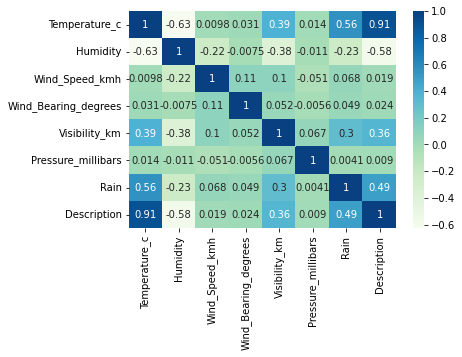

In [ ]:
#plot a heat map
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot = True , cmap="GnBu")

If VIF>=5 for variables, then they should be removed from the model as it means there is an indication that multicollinearity may be present

In [ ]:
df_new = df.iloc[:, 0:14]
vif_data = pd.DataFrame()
vif_data["feature"] = df_new.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_new.values, i)
                          for i in range(len(df_new.columns))]

print(vif_data)

                feature        VIF
0         Temperature_c  18.162166
1              Humidity  20.807962
2        Wind_Speed_kmh   3.529187
3  Wind_Bearing_degrees   4.028013
4         Visibility_km   8.693928
5    Pressure_millibars  35.463173
6                  Rain  14.414691
7           Description  16.904540


From output, we observe that most have have high VIF (>5)

So, we drop column 'Pressure_millibars'

In [ ]:
df_after= df_new.drop('Pressure_millibars',axis=1)

# For each X, calculate VIF and save in dataframe
vif1 = pd.DataFrame()
vif1["VIF Factor"] = [variance_inflation_factor(df_after.values, i) for i in range(df_after.shape[1])]
vif1["features"] = df_after.columns

display(vif1)

,VIF Factor,features
0,17.846542,Temperature_c
1,8.405552,Humidity
2,3.296121,Wind_Speed_kmh
3,3.981074,Wind_Bearing_degrees
4,7.680401,Visibility_km
5,14.366918,Rain
6,16.814139,Description


VIF>5 so, we drop column 'Temperature_c'

In [ ]:
df_after= df_after.drop('Temperature_c',axis=1)
# For each X, calculate VIF and save in dataframe
vif1 = pd.DataFrame()
vif1["VIF Factor"] = [variance_inflation_factor(df_after.values, i) for i in range(df_after.shape[1])]
vif1["features"] = df_after.columns

display(vif1)

,VIF Factor,features
0,7.104280,Humidity
1,3.267190,Wind_Speed_kmh
2,3.970047,Wind_Bearing_degrees
3,7.568575,Visibility_km
4,12.460492,Rain
5,4.937373,Description


VIF>5 so, we drop column 'Rain'

In [ ]:
df_after= df_after.drop('Rain',axis=1)
# For each X, calculate VIF and save in dataframe
vif1 = pd.DataFrame()
vif1["VIF Factor"] = [variance_inflation_factor(df_after.values, i) for i in range(df_after.shape[1])]
vif1["features"] = df_after.columns

display(vif1)

,VIF Factor,features
0,5.158733,Humidity
1,3.196138,Wind_Speed_kmh
2,3.961101,Wind_Bearing_degrees
3,7.077453,Visibility_km
4,3.411947,Description


VIF>5 so, we drop column 'Visibility_km'

In [ ]:
df_after= df_after.drop('Visibility_km',axis=1)
# For each X, calculate VIF and save in dataframe
vif1 = pd.DataFrame()
vif1["VIF Factor"] = [variance_inflation_factor(df_after.values, i) for i in range(df_after.shape[1])]
vif1["features"] = df_after.columns

display(vif1)

,VIF Factor,features
0,4.110576,Humidity
1,3.012619,Wind_Speed_kmh
2,3.899648,Wind_Bearing_degrees
3,2.353209,Description


Now all the VIF values are less than 5 which means there is no multicollinearity


Conclusion: The data has little or no multicollinearity as

i) Data in correlation matrix is less than 1

ii) Diagonally dark color in heat map

iii) VIF<5 (after backselection process)

**2] Linear Relationship**

Scatterplots can show whether
there is a linear or curvilinear relationship

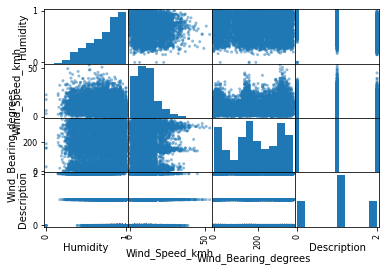

In [ ]:
#plot the scatter matrix
pd.plotting.scatter_matrix(df_after)
plt.show()

Conclusion: The scatter plots indicate a good linear relationship

The standard deviation of the residuals calculates how much the data points spread around the regression line.
The result is used to measure the error of the regression line's predictability.
The smaller the residual standard deviation is compared to the sample standard deviation, the more predictive, or useful, the model is.


In [ ]:
desc_df=df.describe()
#add the standard deviation metric
desc_df.loc['+3std']=desc_df.loc['mean']+(desc_df.loc['std']*3)
desc_df.loc['-3std']=desc_df.loc['mean']-(desc_df.loc['std']*3)
desc_df

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.857208,0.735272,10.813565,185.979700,10.372964,1004.896421,0.891200,1.000600
std,9.512244,0.195498,6.972569,107.469909,4.178680,109.617120,0.311404,0.707707
min,-21.822222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.655556,0.600000,5.747700,112.000000,8.287475,1011.890000,1.000000,0.000000
50%,11.561111,0.780000,9.933700,179.000000,10.046400,1016.500000,1.000000,1.000000
75%,18.822222,0.900000,14.103600,290.000000,14.876400,1021.110000,1.000000,2.000000
max,38.838889,1.000000,53.242700,359.000000,16.100000,1045.380000,1.000000,2.000000
+3std,40.393938,1.321765,31.731271,508.389426,22.909004,1333.747781,1.825411,3.123722
-3std,-16.679523,0.148779,-10.104141,-136.430026,-2.163075,676.045061,-0.043011,-1.122522


**3] Normal Distribution**

i) This is done by plotting QQ plot.
We require the data should lie very closely to the line so that the normality assumption is satisfied.

ii)The box plot shape will show if a statistical data set is normally distributed or skewed.




{'whiskers': [<matplotlib.lines.Line2D at 0x7f37871829d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f37871976d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3787193610>],
 'medians': [<matplotlib.lines.Line2D at 0x7f378719d1d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f378719d710>],
 'means': []}

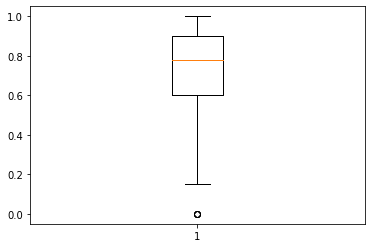

In [ ]:
plt.boxplot(df['Humidity'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f37870fd750>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3787105210>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f37870fd110>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3787105cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f378710a250>],
 'means': []}

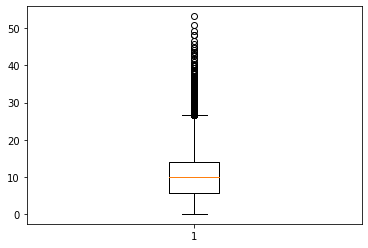

In [ ]:
plt.boxplot(df['Wind_Speed_kmh'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f378706d190>,
 'caps': [<matplotlib.lines.Line2D at 0x7f378706dc10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3787067b10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3787075710>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3787075c50>],
 'means': []}

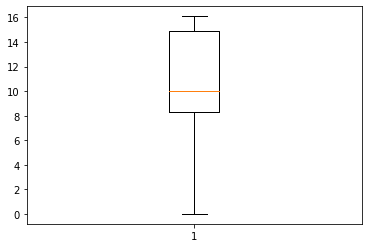

In [ ]:
plt.boxplot(df['Visibility_km'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3786fe4f90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3786fe7a50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3786fe4950>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3786fee550>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3786feea90>],
 'means': []}

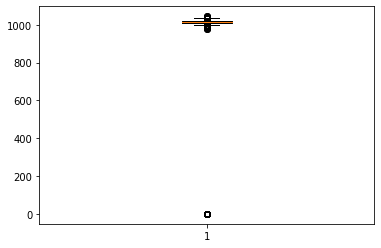

In [ ]:
plt.boxplot(df['Pressure_millibars'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff3ae4546d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff3ae441190>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff3ae454190>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff3ae441c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff3ae4431d0>],
 'means': []}

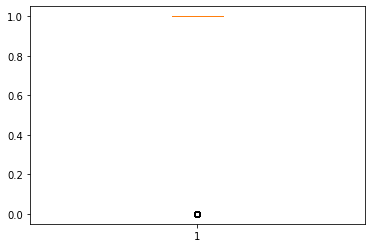

In [ ]:
plt.boxplot(df['Rain'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff3b15e51d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff3ae3cdd50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff3b1630650>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff3b1585d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff3b1585a10>],
 'means': []}

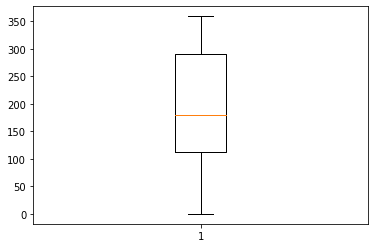

In [ ]:
plt.boxplot(df['Wind_Bearing_degrees'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff3ae3ad390>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff3ae881f50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff3ae3ad310>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff3ae88c0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff3ae88cc10>],
 'means': []}

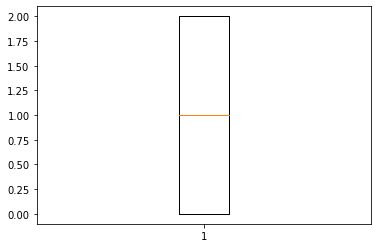

In [ ]:
plt.boxplot(df['Description'])

As we can see 'Description', 'Wind_Speed_kmh' ,'Pressure_millibars' and 'Rain' are normally distributed.

"Humidity' is positively skewed

'Wind_Bearing_degrees', 'Visibility_km' is negatively skewed

Conclusion : Majority of the variables are normally distributed

In [ ]:
X=df.drop(['Visibility_km','Rain','Pressure_millibars','Temperature_c'],axis=1)
Y= df[['Temperature_c']]
X.head()

,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Description
0,0.92,11.2700,130.0,0.0
1,0.73,20.9300,330.0,2.0
2,0.97,5.9731,193.0,1.0
3,0.82,3.2200,300.0,0.0
4,0.60,10.8836,116.0,0.0


Building a regression model

In [ ]:
lm = sm.add_constant(X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
result = sm.OLS(Y,lm).fit()

In [ ]:
result.params

const                    7.405715
Humidity                -8.197587
Wind_Speed_kmh          -0.061495
Wind_Bearing_degrees     0.001356
Description             10.885270
dtype: float64

In [ ]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          Temperature_c   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                 1.319e+04
Date:                Mon, 10 Oct 2022   Prob (F-statistic):               0.00
Time:                        08:01:51   Log-Likelihood:                -27530.
No. Observations:               10000   AIC:                         5.507e+04
Df Residuals:                    9995   BIC:                         5.511e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    7.4057 

The model is good fit after removing variables with VIF>5 as the R_squared value is 84.1%

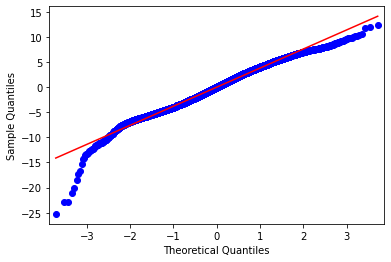

-1.275399341693628e-13

In [ ]:
#Check for the normality of the residuals
sm.qqplot(result.resid, line='s')
pylab.show()

# check that mean of residuals is approx zero
mean_residuals= sum(result.resid)/len(result.resid)
mean_residuals

**4] Checking for Heteroskedasticity**

In [ ]:
#Run white's test
#H0: variances for errors are equal
#H1: variances for errors are ot equal
import statsmodels.stats.diagnostic as sm_diagnostic
_,pval, _, f_pval=sm_diagnostic.het_white(result.resid,result.model.exog)
print(pval, f_pval)

7.279554809166808e-139 4.186251014233026e-144


The output for p value shows that the null hypothesis is retained.

Conclusion: No heteroskedasticity.

 **5] Checking for autocorrelation**

To test autocorrelation , we use statsmodels.stats.diagnostic module and use Ljung - Box test for no autocorrelation of residuals.

H0: The data are random.

H1: The data are not random.

We want the p value that will retain the null hypothesis

The number of lags will be10

(array([0.2345533 , 0.70251632, 0.71834458, 2.707678  , 3.20378422,
       3.55731168, 6.24212493, 7.54936796, 7.995378  , 8.82416406]), array([0.62816799, 0.70380204, 0.86888087, 0.60787173, 0.66860134,
       0.73632967, 0.51177941, 0.47867791, 0.53461207, 0.54886853]))
The lowest p_value found was 0.4787
We fail to reject null hypothesis, there is no autocorrelation



/usr/local/lib/python3.7/dist-packages/statsmodels/stats/diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


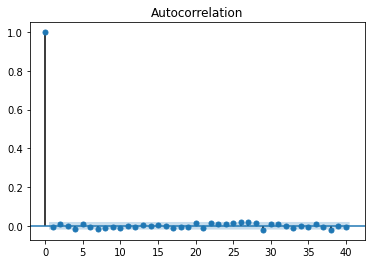

In [ ]:
#Test for autocorrelation

from statsmodels.stats.stattools import durbin_watson
# calculate the lag (optional)
lag= min(10, len(X)//5)
print("The number of lags will be{}".format(lag))
print()

# run ljung Box test for no autocorrelation of residuals

test_results= diag.acorr_ljungbox(result.resid, lags=lag)
print(test_results)

# grab the p value and test statistics
ibvalue, p_val = test_results
# print the results of the test
if min(p_val)>0.05:
  print("The lowest p_value found was {:.4}".format(min(p_val)))
  print("We fail to reject null hypothesis, there is no autocorrelation")
  print()
else:
  print("The lowest p_value found was {:.4}".format(min(p_val)))
  print("We reject null hypothesis, there is autocorrelation")
  print()

# plot autocorrelation
sm.graphics.tsa.plot_acf(result.resid)
plt.show()


ACF starts with a lag of 0, which is the correlation of the time series with itself and therefore results in a correlation of 1.

 Blue area depicts the 95% confidence interval and is an indicator of the significance threshold.

 That means, anything within the blue area is statistically close to zero and anything outside the blue area is statistically non-zero.

#**Conclusion:**
---
All the assumptions of Multiple regression are satisfied

Linear relation between temperature and other variable is as follows :

Temperature_c=7.4507−(8.1976∗Humidity)−(0.0615∗WindSpeedkmh)+(0.0014∗WindBearingdegrees)+(10.8553∗Description)